# Predicting Apple Stock Price Direction

In [2]:
## for data preprocessing
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [38]:
import matplotlib.pyplot as plt

## Data Exploration

We first import the data using read_csv() in pandas library and check the size of the data: how many rows? how many columns?

In [7]:
# import data using read_csv() in pandas library
df = pd.read_csv("/Users/ellypham/Downloads/apple_data.csv")

In [14]:
# data dimension using df.shape()
print('Apple stock data set has:') 
print(df.shape[0], 'rows,', df.shape[1], 'columns')

Apple stock data set has:
10517 rows, 9 columns


In [17]:
# look at the column name, data type, count of non-null values and the memory usage 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10517 non-null  int64  
 1   Date          10517 non-null  object 
 2   Open          10517 non-null  float64
 3   High          10517 non-null  float64
 4   Low           10517 non-null  float64
 5   Close         10517 non-null  float64
 6   Volume        10517 non-null  int64  
 7   Dividends     10517 non-null  float64
 8   Stock Splits  10517 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 739.6+ KB


We have 8 numerical fields, and 1 object which is date. No null value at all and 739.6 kb in size.

In [19]:
# look at the distribution of numerical fields using describe() method
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10517.000000,10517.000000,10517.000000,10517.000000,10517.000000,1.051700e+04,10517.000000,10517.000000
mean,5258.000000,14.760635,14.926131,14.599052,14.769176,3.296316e+08,0.000628,0.001616
std,3036.140725,32.940129,33.332256,32.566604,32.966523,3.385203e+08,0.010331,0.085554
min,0.000000,0.038711,0.038711,0.038276,0.038276,0.000000e+00,0.000000,0.000000
25%,2629.000000,0.236051,0.242122,0.230526,0.236329,1.228416e+08,0.000000,0.000000
50%,5258.000000,0.395741,0.402867,0.388646,0.395509,2.172800e+08,0.000000,0.000000
75%,7887.000000,13.269444,13.445210,13.158978,13.285326,4.090016e+08,0.000000,0.000000
max,10516.000000,181.877391,182.186111,178.381846,181.259933,7.421641e+09,0.230000,7.000000


We will drop the unnamed column since it is not useful for this analysis.

In [25]:
# look at the distribution of the date field using describe() method 
# we need to call it separately because the above functions is implicit, it will only consider the numerical data types
df['Date'].describe()

count          10517
unique         10517
top       1980-12-12
freq               1
Name: Date, dtype: object

In [52]:
# find out min and max of the date object
print('the date range is from', df['Date'].min(), 'to', df['Date'].max())

the date range is from 1980-12-12 to 2022-08-29


# Data Preprocessing

In [56]:
# Change the data type of `Date` and `Volume` using astype() method
df = df.astype({'Date': 'datetime64[ns]',
      'Volume': 'float'})

In [62]:
# Drop unnamed column using drop() method
# we define axis = 1 because we want the column to be deleted
df.drop(['Unnamed: 0'], axis = 1)

In [63]:
# here is a slice of the data after preprocessing
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600.0,0.0,0.0
1,1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800.0,0.0,0.0
2,1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000.0,0.0,0.0
3,1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600.0,0.0,0.0
4,1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600.0,0.0,0.0


Our data ranges from the year of 1980 - 2022, therefore we will divide data by 60/20/20 for training, validation and testing. 
- Training (1980-12-12 to 2005-12-12)
- Validation (2005-12-13 to 2013-12-13)
- Testing (2013-12-14 to 2022-08-29)

In [148]:
# split data for training, validation and testing
df = df.set_index(df['Date']) # set the date field as index to use for splitting
train = df['1980-12-12':'2005-12-12'] # for training 
validate = df['2005-12-13':'2013-12-13'] # for validation
test  = df['2013-12-14':] # for testing

In [154]:
validate.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2005-12-13,2005-12-13,2.282475,2.301076,2.262959,2.286439,4.938164e+08,0.0,0.0
2005-12-14,2005-12-14,2.211729,2.235209,2.142813,2.195873,1.450716e+09,0.0,0.0
2005-12-15,2005-12-15,2.216304,2.221793,2.175747,2.201057,5.611620e+08,0.0,0.0
2005-12-16,2005-12-16,2.199837,2.204716,2.166903,2.168428,6.711712e+08,0.0,0.0
2005-12-19,2005-12-19,2.168428,2.213863,2.166293,2.176661,5.292952e+08,0.0,0.0


In [160]:
# create vertically stacked subplots using subplots() method in matplotlib library
def make_graph(dt):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    # first plot: green line for the high price 
    ax1.plot(dt['Date'], dt['High'], color = 'green')
    ax1.set_xlabel('Date', fontsize=12) # set the label for x axis
    ax1.set_ylabel('Stock Price') # set the label for y axis
    ax1.set_title('Apple\'s Price History') # title for the first plot

    # first plot: add the red line the low price as 
    ax1.plot(dt['Date'], dt['Low'], color = 'red')

    #second plot: orange line for apple volume history
    ax2.plot(dt['Date'], dt['Volume'], color = 'orange')
    ax2.set_xlabel("Date", fontsize=12)
    ax2.set_ylabel("Stock Volume")
    ax2.set_title("Apple's Volume History")

    ax1.grid() # for the grid line in the first plot
    ax2.grid() # for the grid line in the second plot

    plt.show()

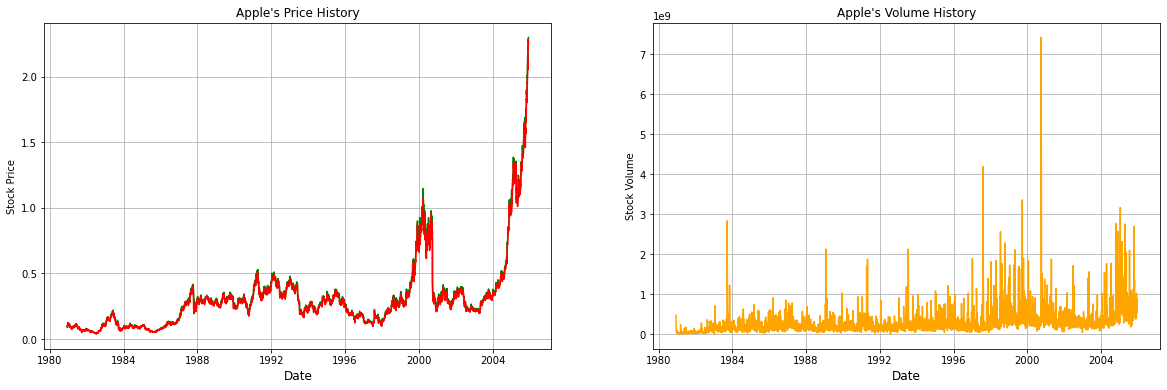

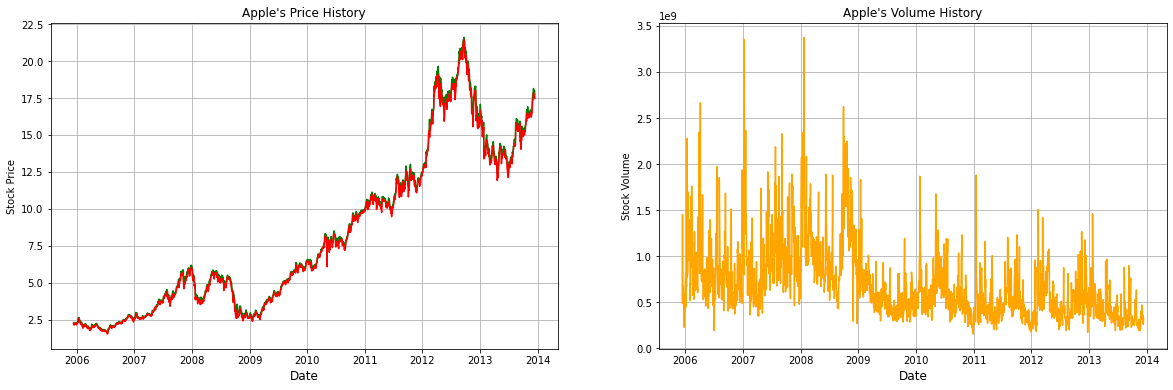

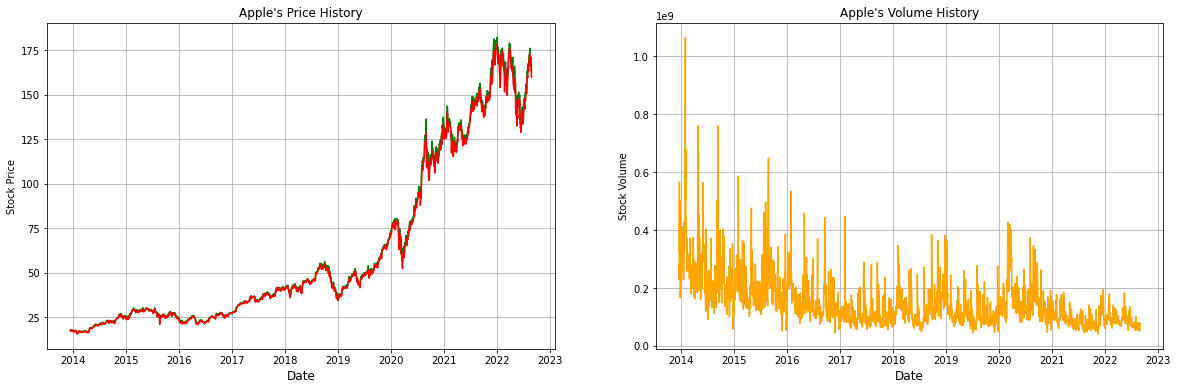

In [161]:
# plotting three data sets: train, validate, test
make_graph(train)
make_graph(validate)
make_graph(test)

Since we wanted to predict the next day and whether the next day's close is higher than the next day's open. What we need to do next is to compare the closing and the opening prices one day in advance.

To do that we are going to move the day to one day before that, meaning we shift the data of the next day to a day back. 

Before implementing this shifting (or moving one day prior) method, we are going to sort the data by date in ascending order.